In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [226]:
#Téléchargement des données

path=""
data=pd.read_csv(path+"data.csv",sep=",",header=0)
data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


# Analyse exploratoire des données 

### On travaille le jeux de données  

#### 1) Vérifier la nature des différentes variables et leur encodage. 

In [227]:
#Ontransforme nos données en DataFrame
data = pd.DataFrame(data)

#On transforme 'Year' en une variable qualitative
data['Year'] = data['Year'].astype('category')

#On transforme la variable 'Density\\n(P/Km2)' en variable numérique
data['Density\\n(P/Km2)'] = pd.to_numeric(data['Density\\n(P/Km2)'].str.replace(',', ''), errors='coerce')

print(data.dtypes)

Entity                                                                object
Year                                                                category
Access to electricity (% of population)                              float64
Access to clean fuels for cooking                                    float64
Renewable-electricity-generating-capacity-per-capita                 float64
Financial flows to developing countries (US $)                       float64
Renewable energy share in the total final energy consumption (%)     float64
Electricity from fossil fuels (TWh)                                  float64
Electricity from nuclear (TWh)                                       float64
Electricity from renewables (TWh)                                    float64
Low-carbon electricity (% electricity)                               float64
Primary energy consumption per capita (kWh/person)                   float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          float64

#### 2. Déterminez le taux de valeurs manquantes pour chaque variable

In [228]:
#Calcul du taux de valeurs manquantes 

Val_Manquante = {}

for col in data.columns: 
    Val_Manquante[col] = data[col].isna().sum()/36.49
        
#print(Val_Manquante)

In [229]:
#suppression des données 
data=data.drop('Renewable-electricity-generating-capacity-per-capita', axis=1)
data=data.drop('Financial flows to developing countries (US $)', axis=1)
data=data.drop('Renewables (% equivalent primary energy)', axis=1)

#### 3. Enlever les individus qui ont des valeurs manquantes 

In [230]:
data = data.dropna() #suppression des individus contenant des valeurs manquantes
#data = data.reset_index(drop=True) #réinitialisation de l'index des lignes
data

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
3,Afghanistan,2003,14.738506,9.50,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.90,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.939110,67.709953
5,Afghanistan,2005,25.390894,12.20,33.88,0.34,0.0,0.59,63.440857,252.06912,1.41,1549.999952,11.229715,242.031313,60.0,652230.0,33.939110,67.709953
6,Afghanistan,2006,30.718690,13.85,31.89,0.20,0.0,0.64,76.190475,304.42090,1.50,1759.999990,5.357403,263.733602,60.0,652230.0,33.939110,67.709953
7,Afghanistan,2007,36.051010,15.30,28.78,0.20,0.0,0.75,78.947370,354.27990,1.53,1769.999981,13.826320,359.693158,60.0,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3643,Zimbabwe,2015,33.700000,29.50,80.82,4.02,0.0,5.37,57.188496,3860.92020,10.36,12430.000310,1.779873,1445.069702,38.0,390757.0,-19.015438,29.154857
3644,Zimbabwe,2016,42.561730,29.80,81.90,3.50,0.0,3.32,48.680350,3227.68020,10.00,11020.000460,0.755869,1464.588957,38.0,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.80,82.46,3.05,0.0,4.30,58.503407,3068.01150,9.51,10340.000150,4.709492,1235.189032,38.0,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.90,80.23,3.73,0.0,5.46,59.412407,3441.98580,9.83,12380.000110,4.824211,1254.642265,38.0,390757.0,-19.015438,29.154857


In [231]:
data.describe()

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
count,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2.868000e+03,2868.000000,2868.000000,2868.000000,2.868000e+03,2868.000000,2868.000000
mean,76.584630,62.170084,35.802071,76.693556,15.337019,26.603375,39.629403,26082.456843,5.418111,1.688182e+05,3.895326,12577.050921,228.214784,6.581668e+05,18.140402,12.970486
std,31.510371,39.238548,30.024000,374.419806,78.776075,107.640273,34.454884,37097.457254,3.577415,8.180202e+05,4.645613,18730.476190,742.358140,1.705048e+06,24.924975,65.478645
min,1.252269,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.110120,1.030000,3.000000e+01,-36.658153,111.927225,2.000000,2.100000e+01,-40.900557,-175.198242
25%,53.237811,22.075000,9.187500,0.290000,0.000000,0.090000,6.091074,2779.966525,3.280000,2.187500e+03,1.770575,1209.802655,31.000000,2.974300e+04,1.650801,-10.940835
50%,97.000000,81.550000,28.790000,2.995000,0.000000,1.680000,35.009718,11922.761000,4.400000,1.042500e+04,3.788166,4168.110171,83.000000,1.319570e+05,17.060816,18.643501
75%,100.000000,100.000000,60.667500,25.787500,0.000000,10.102500,66.879318,31838.556000,6.140000,5.814500e+04,5.957490,14828.344425,206.000000,4.881000e+05,39.399872,43.679291
max,100.000000,100.000000,96.040000,5098.220000,809.410000,2014.570000,100.000010,262585.700000,32.570000,1.070722e+07,63.379875,123514.196700,8358.000000,9.984670e+06,64.963051,178.065032


In [232]:
print("La taille des données est" , data.shape)

La taille des données est (2868, 18)


In [233]:
colonms = ["Entity","Year","Access_to_elec","Access_to_fuels","Renewable_energy_share","Elec_from_fossils",
           "Elec_from_nuclear","Elec_from_renewables","Low_carbon_elec","Prim_energy_cons","Energy_intensity_level",
            "Value_CO2","Gdp_growth","Gdp_capita","Density","Land_area","Latitude","Longitude"]

data.rename(columns=dict(zip(data.columns, colonms)), inplace=True)
data.head()

,Entity,Year,Access_to_elec,Access_to_fuels,Renewable_energy_share,Elec_from_fossils,Elec_from_nuclear,Elec_from_renewables,Low_carbon_elec,Prim_energy_cons,Energy_intensity_level,Value_CO2,Gdp_growth,Gdp_capita,Density,Land_area,Latitude,Longitude
3,Afghanistan,2003,14.738506,9.50,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.90,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.93911,67.709953
5,Afghanistan,2005,25.390894,12.20,33.88,0.34,0.0,0.59,63.440857,252.06912,1.41,1549.999952,11.229715,242.031313,60.0,652230.0,33.93911,67.709953
6,Afghanistan,2006,30.718690,13.85,31.89,0.20,0.0,0.64,76.190475,304.42090,1.50,1759.999990,5.357403,263.733602,60.0,652230.0,33.93911,67.709953
7,Afghanistan,2007,36.051010,15.30,28.78,0.20,0.0,0.75,78.947370,354.27990,1.53,1769.999981,13.826320,359.693158,60.0,652230.0,33.93911,67.709953


### Analyse descriptive unidimentionnelle 

#### Varibales quantitatives

Les données ont des unités très différentes donc il n'est pas pertinant de les comparer entres elles. 

#### 4. Transformation de certaines varibales 

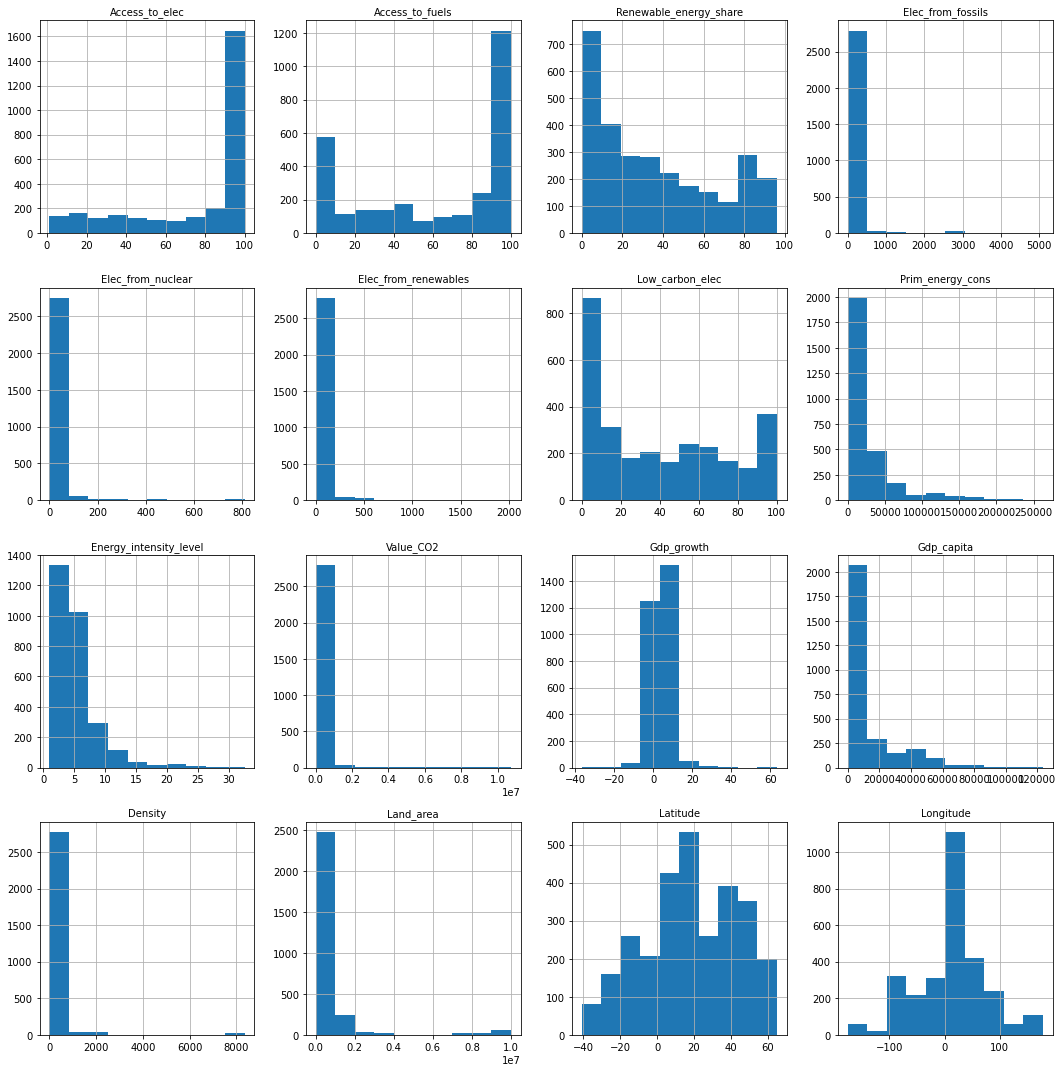

In [234]:
fig ,axs = plt.subplots(4,4, figsize=(15,15)) 

col = data.columns
axs = axs.flatten()

for i in range(len(col)-2):
    data[col[i + 2]].hist(ax=axs[i], bins = 10)
    axs[i].set_title(col[i + 2], fontsize=10)

plt.tight_layout()
plt.show()

On va recentrer les variables qui semblent très éparpillées : 
- Electricity from fossil fuels (TWh)                                
- Electricity from nuclear (TWh)                                       
- Electricity from renewables (TWh)  
- Primary energy consumption per capita (kWh/person)                   
- Energy intensity level of primary energy          
- Value_co2_emissions_kt_by_country                                                          
- gdp_per_capita                                                       
- Density\n(P/Km2)
- Land_Area


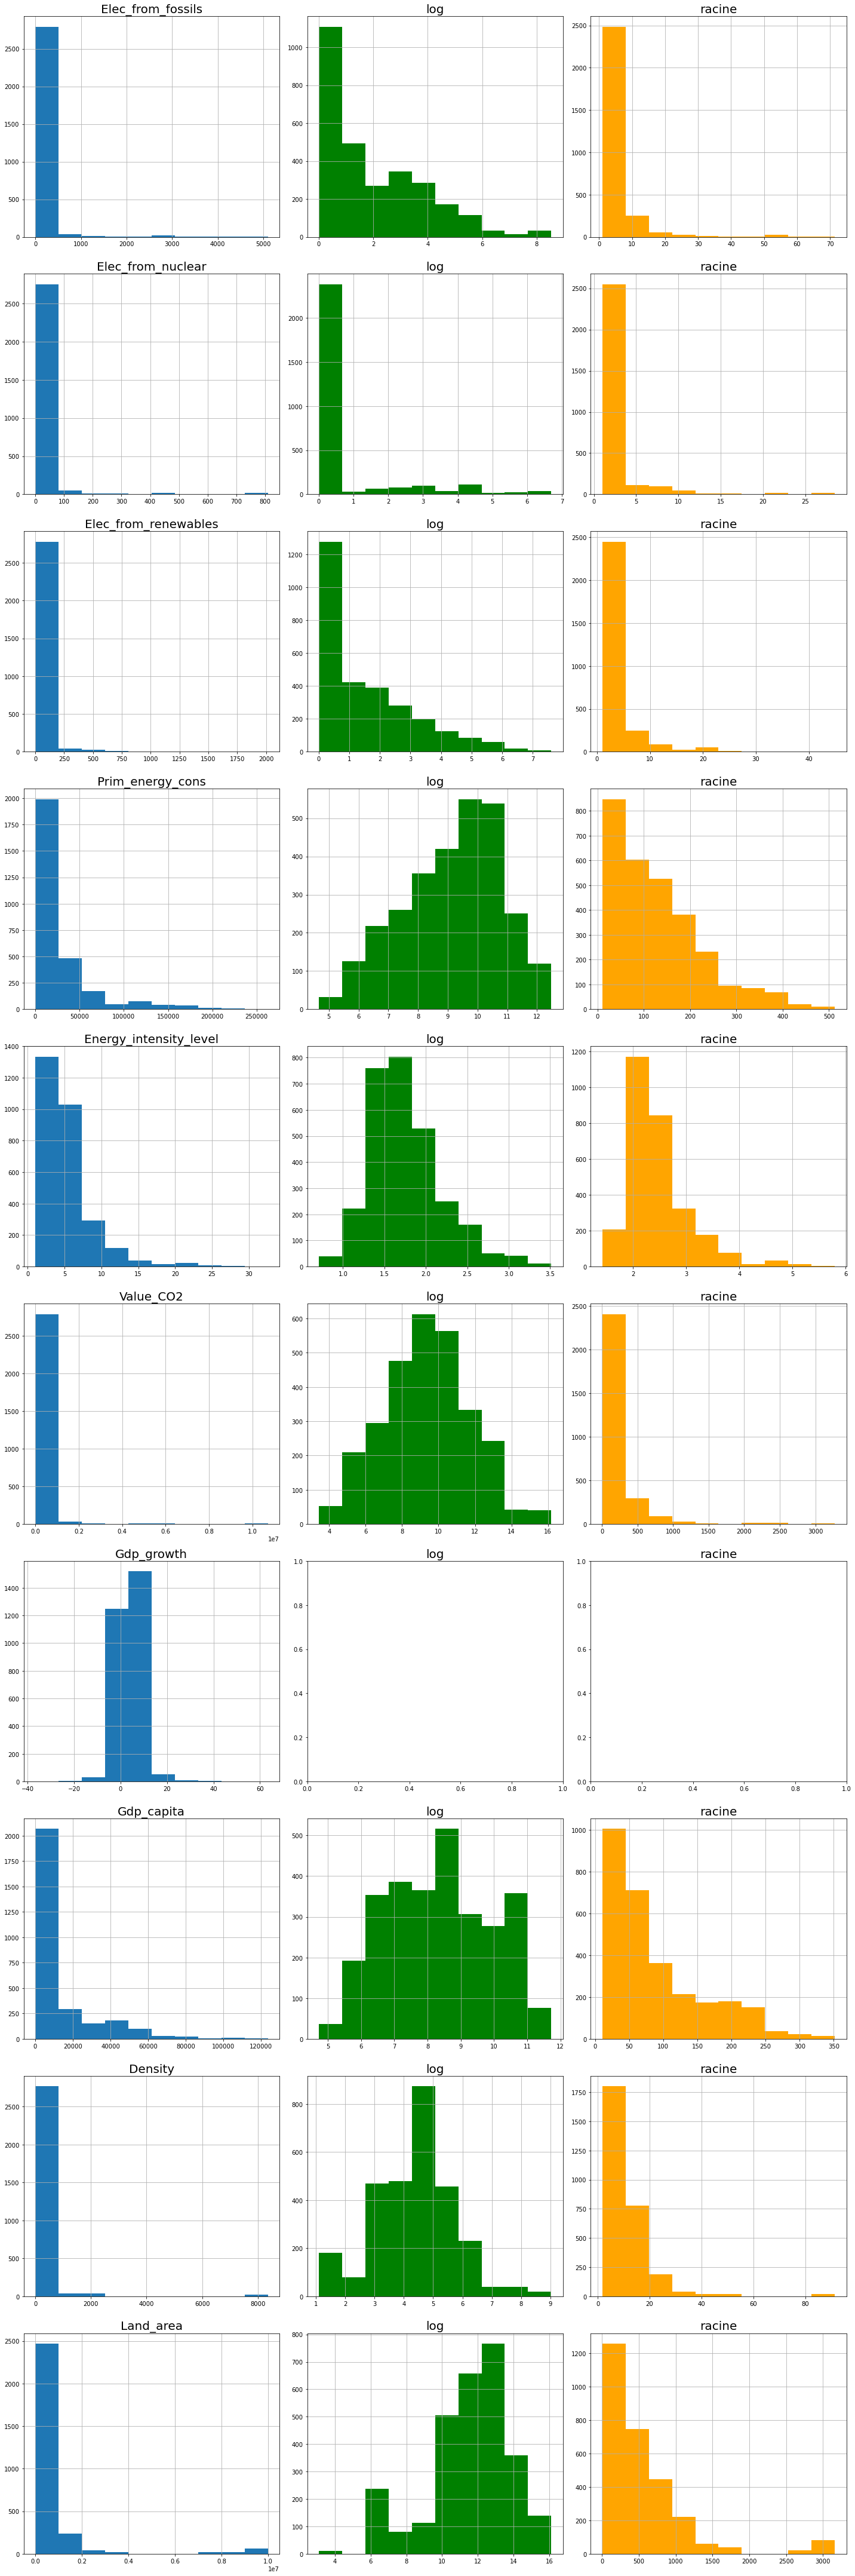

In [235]:
from math import sqrt, log

list_col = list(data.columns)

list_col_a_recentrer =  list_col[5:8] + list_col[9:16] # Enlevons les variables que l'on ne désire pas recentrer 

fig ,axs = plt.subplots(len(list_col_a_recentrer),3, figsize=(20,60)) # prépare pour dessiner la figure


for i,col in enumerate(list_col_a_recentrer):  
    
    data[col].hist(ax=axs[i][0], bins = 10)
    
    if (data[col] >= 0).all():  # Vérifie si toutes les valeurs sont positives
        data[col].map(lambda x: np.log(x+1)).hist(ax=axs[i][1], bins = 10, color='green')
        data[col].map(lambda x: np.sqrt(x+1)).hist(ax=axs[i][2], bins = 10, color='orange')


    axs[i][0].set_title(col, fontsize=20)
    axs[i][1].set_title('log', fontsize=20)
    axs[i][2].set_title('racine', fontsize=20)


plt.tight_layout()
plt.show()


Il sembmle plus interrant de prendre la transformation log qui permet de bien recentrer nos données.  On continuera la suite de l'analyse avec ces modifications. 

In [236]:
data_centre=data # création d'un nouveau tableau avec les valeurs recentrées

list_col = list(data.columns)
list_col_quanti = list_col[2:]
list_var_a_recentrer =  list_col[5:8] + list_col[9:12] + list_col[13:15] # col_r est une liste constituée du nom des variables à recentrer 

for col in list_var_a_recentrer:
    data_centre[col] = data[col].map(lambda x: np.log(x+1))
    data_centre = data_r.rename(columns={col : 'L' + col })


data_centre.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh)_log,Electricity from nuclear (TWh)_log,Electricity from renewables (TWh)_log,Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person)_log,Energy intensity level of primary energy (MJ/$2017 PPP GDP)_log,Value_co2_emissions_kt_by_country_log,gdp_growth,gdp_per_capita_log,Density\n(P/Km2)_log,Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,44.99,0.148420,0.0,0.270027,65.957440,5.715694,0.970779,6.634633,NaN,NaN,4.110874,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,45.60,0.086178,0.0,0.405465,84.745766,5.471816,1.007958,6.594413,NaN,NaN,4.110874,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,37.83,0.122218,0.0,0.444686,81.159424,5.355936,0.875469,6.938284,NaN,5.195324,4.110874,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,36.66,0.270027,0.0,0.488580,67.021280,5.442280,0.875469,7.107425,8.832278,5.255847,4.110874,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,44.24,0.285179,0.0,0.444686,62.921350,5.324137,0.788457,6.938284,1.414118,5.358387,4.110874,652230.0,33.93911,67.709953


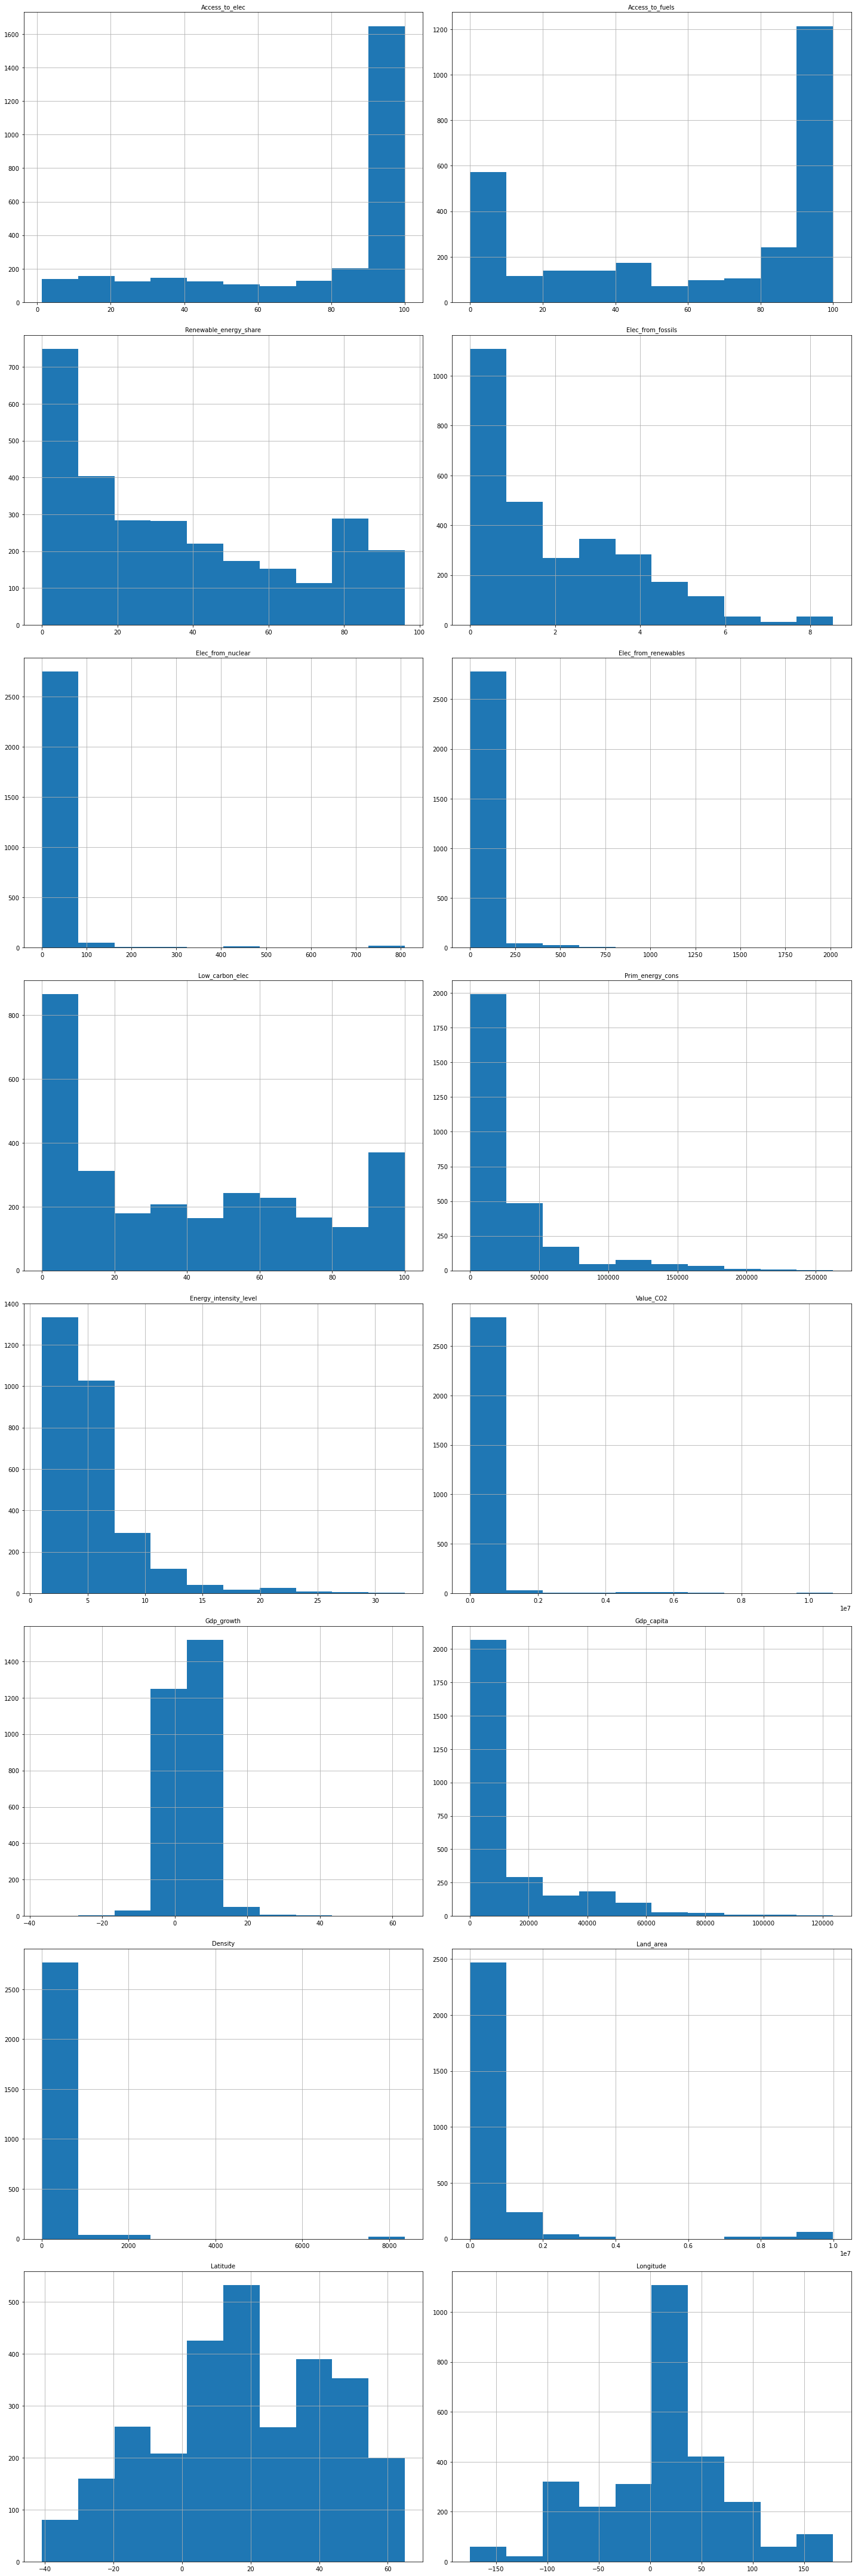

In [237]:
list_col = list(data.columns)
list_col_quanti = list_col[2:]

fig ,axs = plt.subplots(8,2, figsize=(20,60)) # prépare pour dessiner la figure
axs = axs.flatten()

for i,col in enumerate(list_col_quanti):
    data[col].hist(ax=axs[i], bins = 10)
    axs[i].set_title(col, fontsize=10)

plt.tight_layout()
plt.show()

NameError: name 'data_2' is not defined

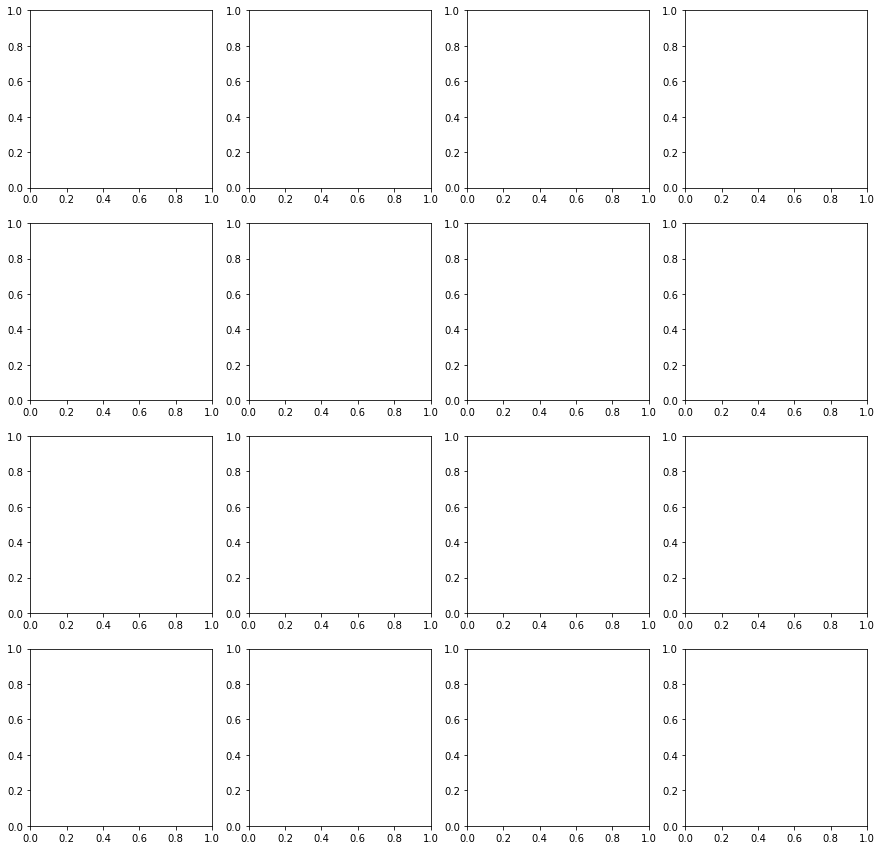

In [238]:
fig2 ,axs2 = plt.subplots(4,4, figsize=(15,15)) 

col2 = data_2.columns
axs2 = axs2.flatten()

for i in range(len(col2) - 2):
    data_2[col2[i + 2]].hist(ax=axs2[i])
    axs2[i].set_title(col2[i + 2], fontsize=10)

plt.tight_layout()
plt.show()

Idée : Affichage du CO2 en fonction de la localisation du pays (voir ADD) scatter map 

#####  Variables qualitatives 

In [ ]:
#Nombre d'années de relevé par Pays 

Pays_valeurs = data.Entity.value_counts()
print(Pays_valeurs)
print('')

Etant donné qu'on a enlevé des lignes qui avaient des valeurs manquantes, il sera important de prendre en compte que certains pays ont des relevés sur moins d'années. 

#### 5. Visualisez la grande hétérogénéité des émissions de CO2 entre les pays

In [240]:
#On créer un tableau avec la moyenne pour chaque pays de l'emission en CO2

data_np = data.to_numpy()
Moy_annee_CO2 = []
ind=0
Moy_annee_CO2.append(data_np[0][11])
Pays = []
Pays.append(data_np[0][0])

for i in range(data_np.shape[0] -1) : 
    if data_np[i+1][0]== data_np[i][0] : 
        Moy_annee_CO2[ind]+= data_np[i+1][11]
    else : 
        Moy_annee_CO2[ind] = Moy_annee_CO2[ind]/Pays_valeurs[data_np[i][0]] #moyenne de la somme de CO2 produite sur les années de prélèvement 
        Moy_annee_CO2.append(data_np[i+1][11])
        Pays.append(data_np[i+1][0])
        ind+=1


{'whiskers': [<matplotlib.lines.Line2D at 0x15e5f7fbee0>,
 'caps': [<matplotlib.lines.Line2D at 0x15e5d3e9640>,
 'boxes': [<matplotlib.lines.Line2D at 0x15e5f7fbb50>],
 'medians': [<matplotlib.lines.Line2D at 0x15e5d3e9d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x15e5d3d6130>],
 'means': []}

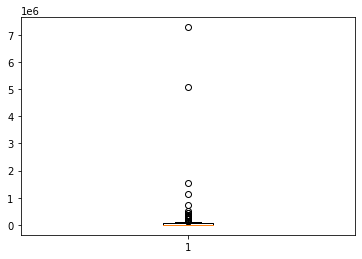

In [241]:
#Affichage de la valeur CO2 
plt.boxplot(Moy_annee_CO2)

Héterogénéité flagrante avec les points outliers. 

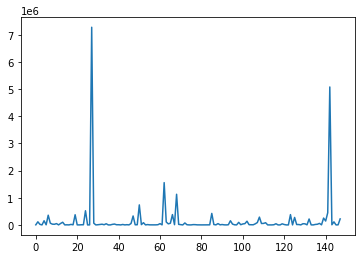

In [242]:
plt.plot(Moy_annee_CO2)

In [243]:
#CO2 pour chaque pays 
CO2_Pays = dict(zip(Pays, Moy_annee_CO2))
CO2_Pays_trie = dict(sorted(CO2_Pays.items(), key=lambda item: item[1], reverse=True))
print('Les 5 pays produisant le plus de CO2 en cummulé sont :')

for Pays, Moy_annee_CO2 in list(CO2_Pays_trie.items())[:5]:
    print(f"{Pays}: {Moy_annee_CO2} ")
#CO2_trie = np.sort(CO2)[::-1]


Les 5 pays produisant le plus de CO2 en cummulé sont :
China: 7272992.822238095 
United States: 5075750.984952381 
India: 1556170.4758666668 
Japan: 1127366.1764285713 
Germany: 736804.2882714284 


### Analyse descriptive multidimentionnelle 

#### 6. Analyse des dépendances entre les variables quantitatives.

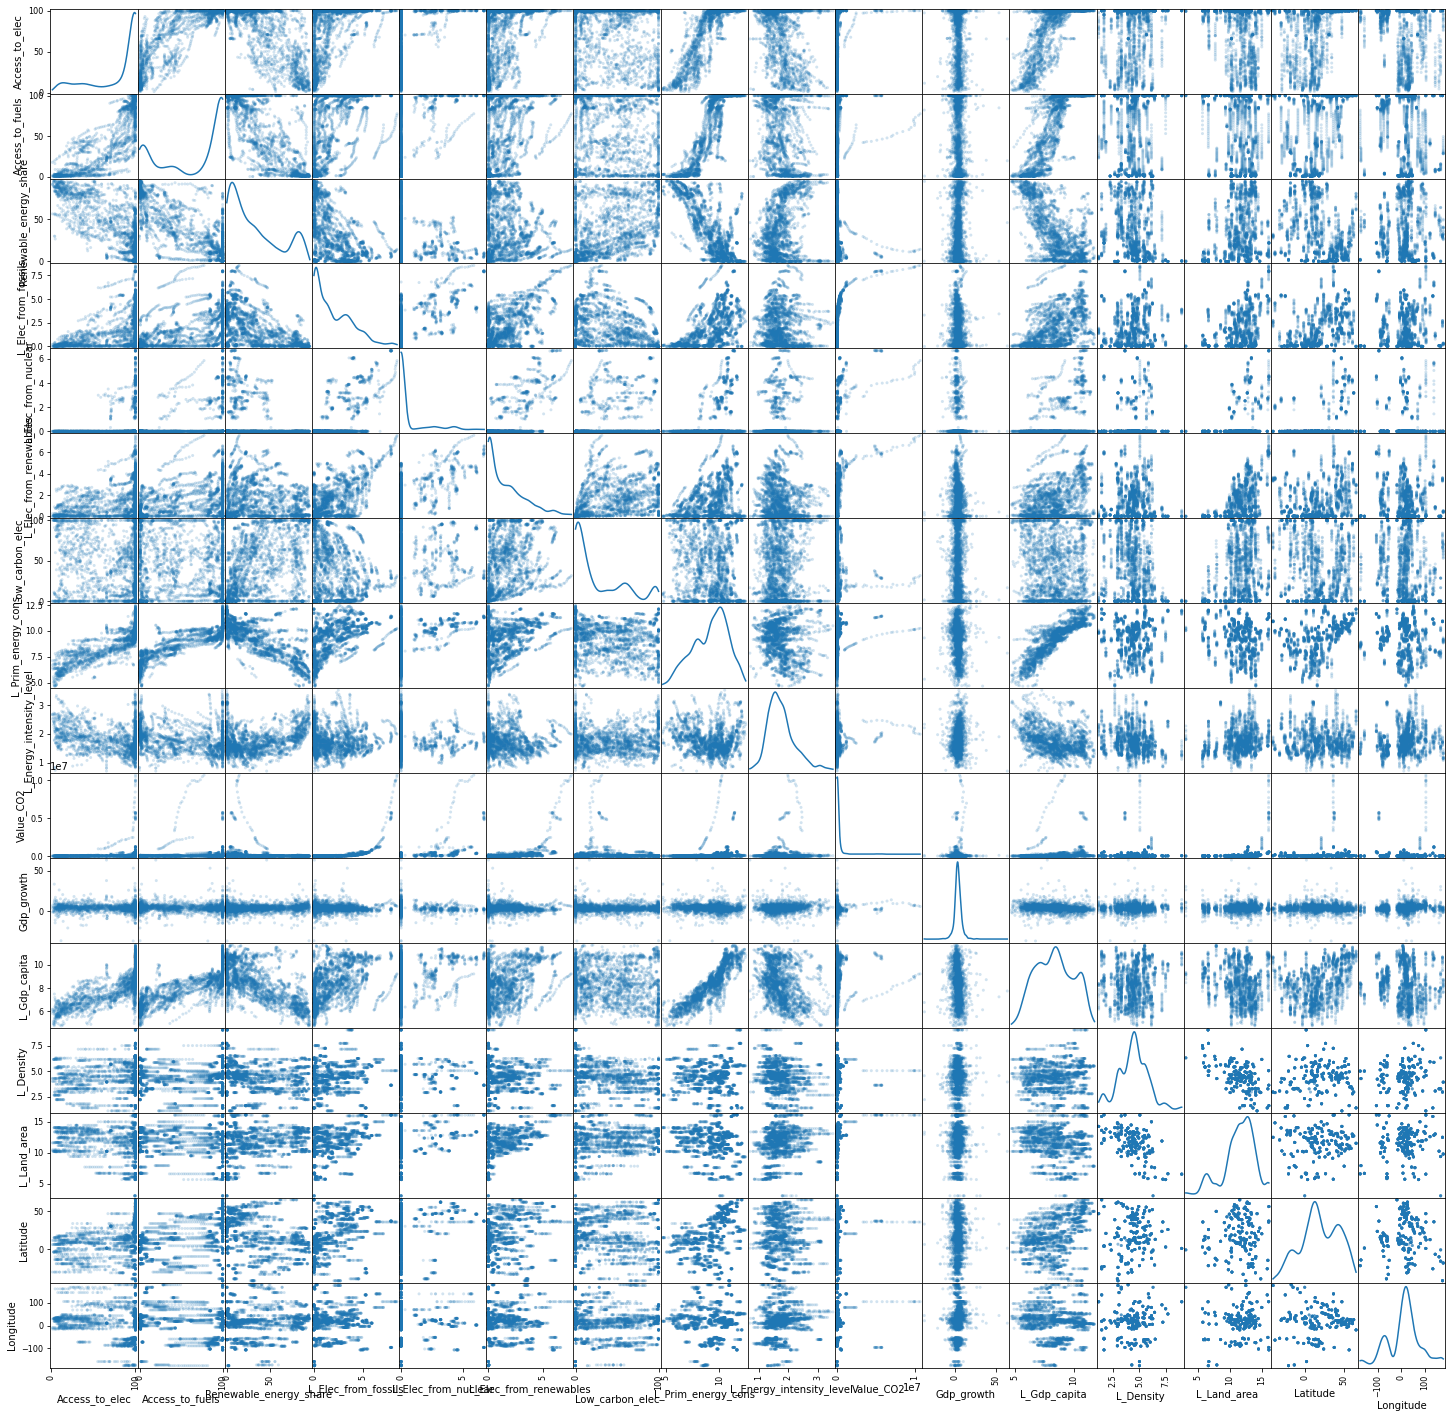

In [180]:
from pandas.plotting import scatter_matrix

scatter_matrix(data[2:], alpha=0.2, 
               figsize=(25, 25), diagonal='kde')
plt.show()

Trop de varibales pour le graph soit clair et lisible. On va selectionner les variables les plus pertinantes. 

Du graphique ci dessus on voit que les varibales des cases 4,5,6 et 10 (axis) ne semble pas corrélées avec d'autres variables. On va donc les enlever. 

### Analyse en composantes principales 

#### 7. ACP 

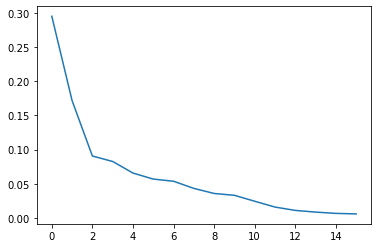

In [244]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from pandas.plotting import scatter_matrix

data_scaled=scale(data[data.columns[2:18]])
acp = PCA()
data_acp = acp.fit_transform(data_scaled)

plt.plot(acp.explained_variance_ratio_)
plt.show()

Il semble difficil d'identifier le coude, 2 dimensions semble peu probable. Voyant les variances cumulées. 

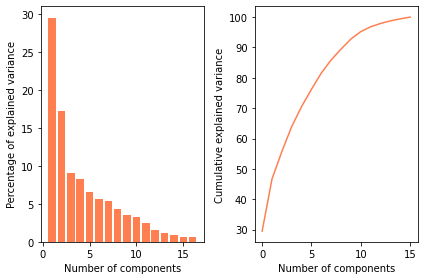

Varianceexpliquée par les 7 premières composentes: 81.6


In [245]:
# %load solutions/pca/pca_components.py
explained_variance_ratio = 100*acp.explained_variance_ratio_

plt.subplot(1,2,1)
n_bars = 16
x = np.arange(1, n_bars + 1)
plt.bar(x, explained_variance_ratio[:n_bars], color='coral')
plt.xlabel("Number of components")
plt.ylabel("Percentage of explained variance")

plt.subplot(1,2,2)
plt.plot(np.cumsum(explained_variance_ratio), color='coral')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

plt.tight_layout()
plt.show()
print("Varianceexpliquée par les 7 premières composentes:", round(sum([explained_variance_ratio[i] for i in range(7)]),2))

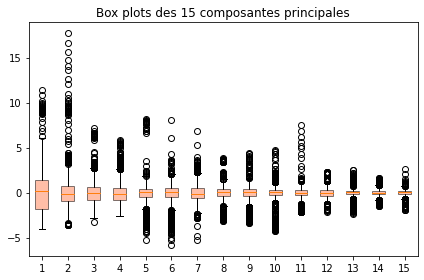

In [246]:
box = plt.boxplot(data_acp[:,:15], patch_artist=True)
plt.setp(box["boxes"], facecolor="coral", alpha=.5)
plt.title("Box plots des 15 composantes principales")
plt.tight_layout()
plt.show()

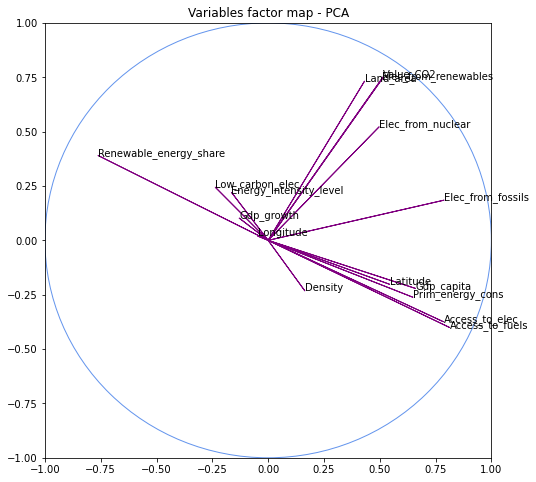

In [248]:
coord1 = acp.components_[0] * np.sqrt(acp.explained_variance_[0])
coord2 = acp.components_[1] * np.sqrt(acp.explained_variance_[1])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1, coord2, data.columns[2:]):
    plt.text(i, j, nom, fontsize=10)
    plt.arrow(0, 0, i, j, color = 'purple', width = 0.0001)

plt.axis((-1, 1, -1, 1))
plt.gcf().gca().add_artist(plt.Circle((0, 0), radius = 1, color = 'cornflowerblue', fill = False))

plt.title('Variables factor map - PCA')
plt.show()

<AxesSubplot:>

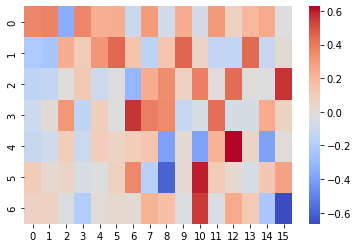

In [249]:
import seaborn as sns

#data.index = ['Composante {}'.format(i+1) for i in range(len(data.columns))]

sns.heatmap(acp.components_[:7], annot=False, cmap='coolwarm')

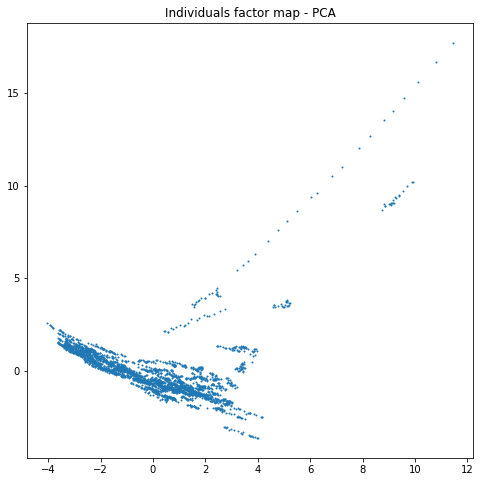

In [250]:
plt.figure(figsize=(8,8))
plt.scatter(data_acp[:, 0], data_acp[:, 1], s=1, linewidths=1)
plt.title("Individuals factor map - PCA")
plt.show()

Au final on va continuer l'analyse en se restreignant à 7 composantes. 

In [252]:
data_reduit = data_pca[:,:7]

#### 8) Visualiser la dépendence de la varibale 'Year' et de la varibale à prédire

In [ ]:
#faire une moyenne du CO2 sur les années et plot 